<h1>Analyzing the Data</h1>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from datetime import datetime, date
plt.style.use('ggplot')

In [31]:
master = pd.read_csv('G2Mmaster.csv')

In [32]:
master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808


In [98]:
master.shape

(359392, 18)

Areas of Interest:
<ol>
    <li>Which company services the most cab rides in total and per city/year/month?</li>
    <li>How many customers does each company have?</li>
    <li>What demographic is typically attracted to each company (age/gender/income)?</li>
    <li>What percentage of cab users are customers of each company in each city?</li>
    <li>Which company has more customer loyalty (# repeat riders/# repeat riders in consecutive years)?</li>
    <li>What is the difference in profits per company?</li>
    <li>What is the average profit per ride?</li> 
</ol>

<h2>Ride Count</h2>
1. Which company services the most cab rides?

<h3>In total</h3>

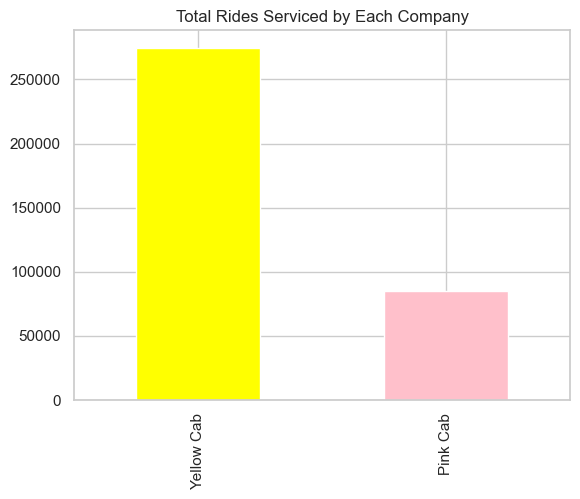

In [33]:
sns.set(style="whitegrid")
ride_count = master['Company'].value_counts()\
.plot(kind='bar', 
      color=['yellow','pink'],
      title='Total Rides Serviced by Each Company')

<h3>By year</h3>

<Figure size 1000x600 with 0 Axes>

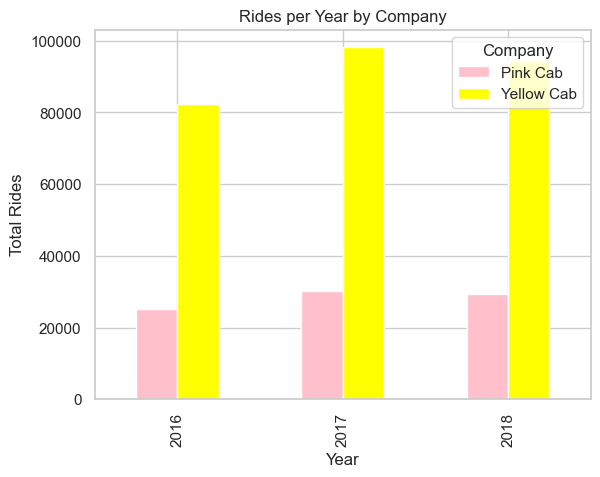

In [37]:
master['Date of Travel'] = pd.to_datetime(master['Date of Travel'])
master['Year'] = master['Date of Travel'].dt.year
rides_per_year_company = master.groupby(['Year', 'Company']).size().unstack(fill_value=0)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
rides_per_year_company.plot(kind='bar',color=['pink','yellow'])
plt.title('Rides per Year by Company')
plt.xlabel('Year')
plt.ylabel('Total Rides')
plt.legend(title='Company')
plt.show()

<h3>By month</h3>

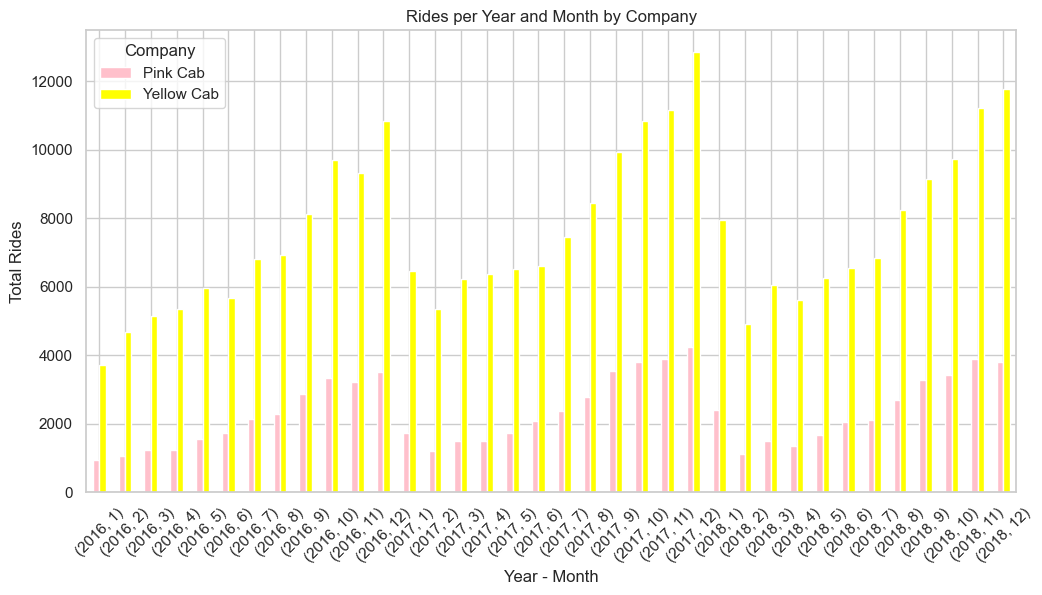

In [38]:
master['Month'] = master['Date of Travel'].dt.month
rides_per_year_month_company = master.groupby(['Year', 'Month', 'Company']).size().unstack(fill_value=0)
sns.set(style="whitegrid")
rides_per_year_month_company.plot(kind='bar',color=['pink','yellow'],figsize=(12, 6), width=0.5)  # Adjust the width as needed
plt.title('Rides per Year and Month by Company')
plt.xlabel('Year - Month')
plt.ylabel('Total Rides')
plt.legend(title='Company')
plt.xticks(rotation=45) 
plt.show()

<h3>By city, total</h3>

In [34]:
master['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

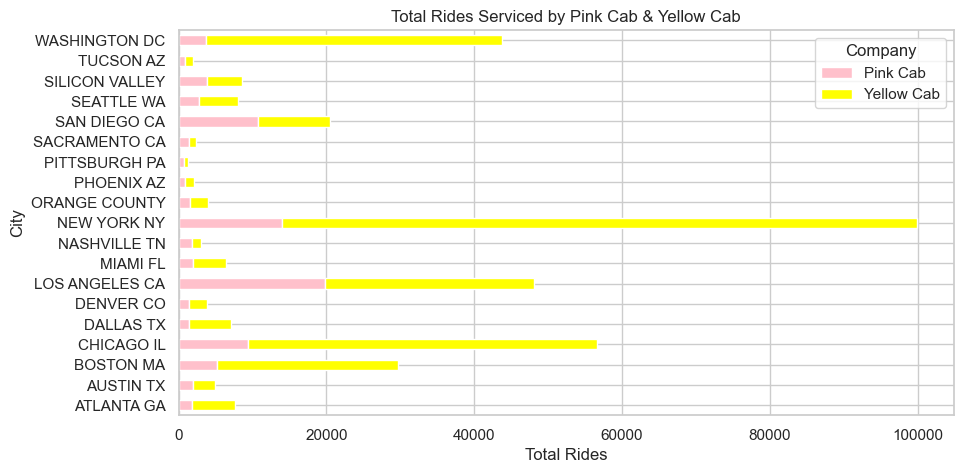

In [35]:
sns.set(style="whitegrid")
ride_count = master.groupby(['City', 'Company']).size().unstack()
ax = ride_count.plot(kind='barh', 
                     stacked=True, 
                     title='Total Rides Serviced by Pink Cab & Yellow Cab', 
                     color=['pink','yellow'],
                    figsize=(10, 5))
ax.set_ylabel('City')
ax.set_xlabel('Total Rides')
plt.xticks(rotation=0)
ax.legend(title='Company')
plt.show()

<h3>By city, percentage</h3>

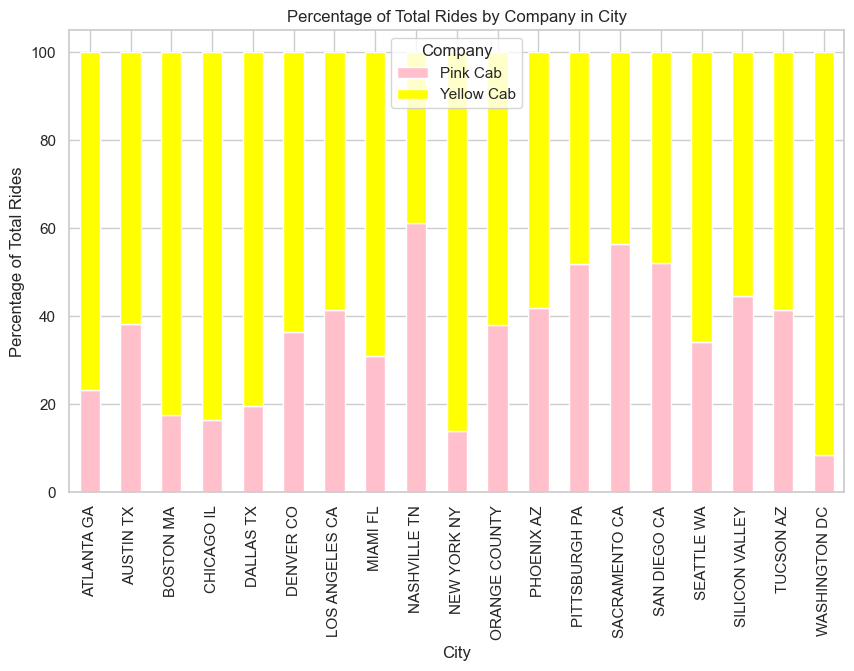

In [55]:
percentage_rides_per_company_city = master.groupby(['City', 'Company']).size() / master.groupby('City').size()
percentage_rides_per_company_city *= 100
percentage_rides_per_company_city = percentage_rides_per_company_city.reset_index()

pivot_table = percentage_rides_per_company_city.pivot(index='City', columns='Company', values=0)

sns.set(style="whitegrid")
pivot_table.plot(kind='bar', figsize=(10, 6), color=['pink','yellow'], stacked=True)
plt.title('Percentage of Total Rides by Company in City')
plt.xlabel('City')
plt.ylabel('Percentage of Total Rides')
plt.legend(title='Company')
plt.show()

for container in ax.containers:
    ax.bar_label(container, labels=[f'{val:.1f}%' for val in container.datavalues], 
                 label_type='center', fontsize=8, color='black')

1. Which company services the most cab rides?
<ul><li>Yellow Cab serviced the most rides in all categories.</li><ul>

<h2>Customer Base</h2>
<ol start='2'>
    <li>How many customers does each company have?</li>
    <li>What demographic is typically attracted to each company (age/gender/income)?</li>
    <li>What percentage of cab users are customers of each company in each city?</li>
    <li>Which company has more customer loyalty (repeat riders/repeat riders in consecutive years)?</li>
</ol>

In [39]:
unique_customer_count_by_company = master.groupby('Company')['Customer ID'].nunique()
print(unique_customer_count_by_company)

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64


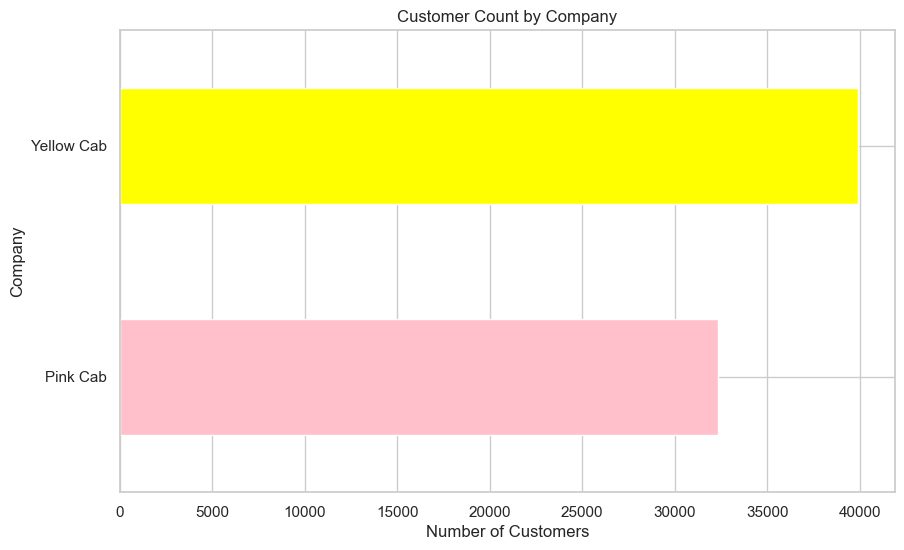

In [54]:
customer_count_by_company = master.groupby('Company')['Customer ID'].nunique()
sns.set(style="whitegrid")
customer_count_by_company.plot(kind='barh', color=['pink','yellow'], figsize=(10, 6))
plt.title('Customer Count by Company')
plt.xlabel('Number of Customers')
plt.ylabel('Company')
plt.show()

Seeing that Yellow Cab has only roughly 7.5 thousand more clients, and service many more rides, it is worth comparing the number of customers to percentage of total rides.

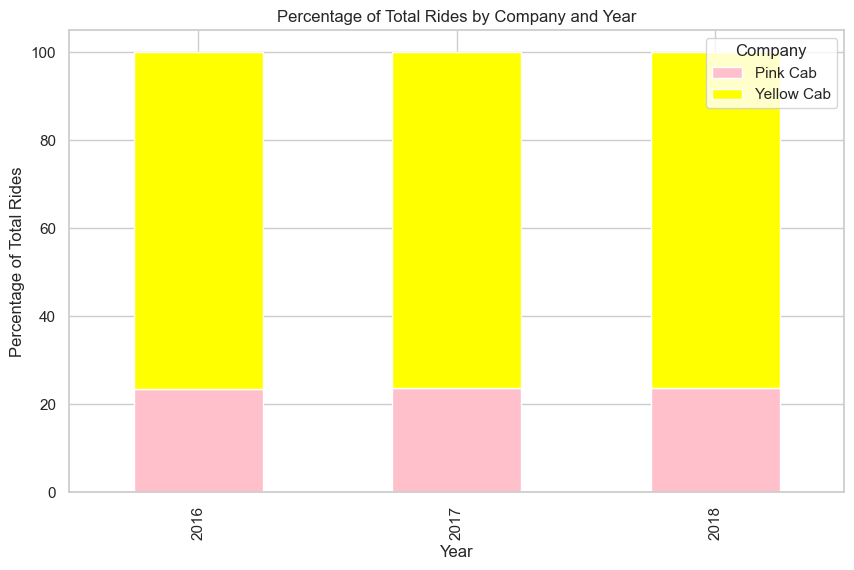

In [41]:
percentage_rides_per_company_year = master.groupby(['Year', 'Company']).size() / master.groupby('Year').size()
percentage_rides_per_company_year *= 100
percentage_rides_per_company_year = percentage_rides_per_company_year.reset_index()

pivot_table = percentage_rides_per_company_year.pivot(index='Year', columns='Company', values=0)

sns.set(style="whitegrid")
pivot_table.plot(kind='bar', figsize=(10, 6), color=['pink','yellow'], stacked=True)
plt.title('Percentage of Total Rides by Company and Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Rides')
plt.legend(title='Company')
plt.show()

for container in ax.containers:
    ax.bar_label(container, labels=[f'{val:.1f}%' for val in container.datavalues], 
                 label_type='center', fontsize=8, color='black')

As the plot shows, Yellow Cab services about 75% more rides per year with only about 20% more clients in their customer base.

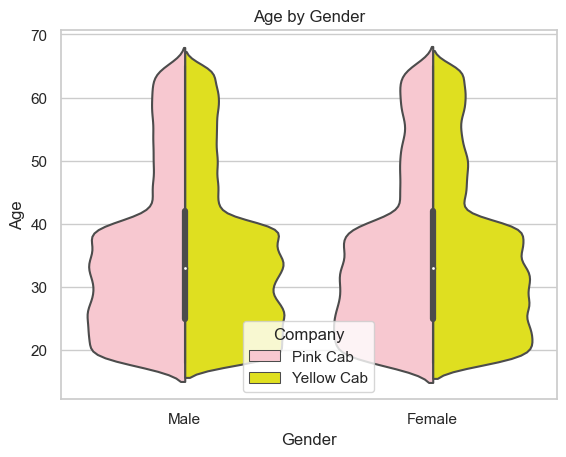

In [49]:
sns.set(style="whitegrid")
company_colors = {'Pink Cab': 'pink', 'Yellow Cab': 'yellow'}
# gender
sns.violinplot(data=master, x='Gender', y='Age', hue='Company', 
               palette=company_colors, split=True)
plt.title('Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

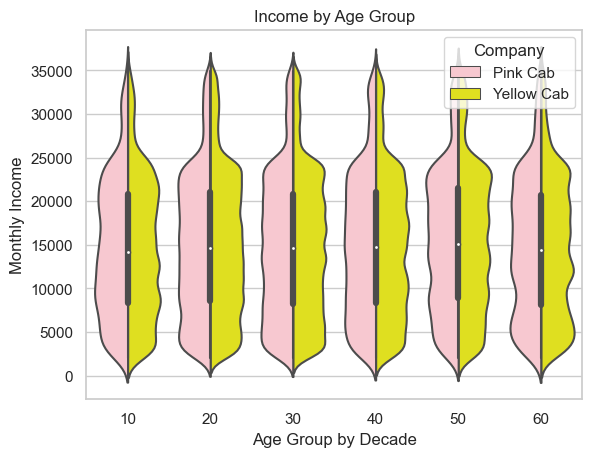

In [52]:
# age
master['Age Group'] = (master['Age'] // 10) * 10
sns.violinplot(data=master, x='Age Group', y='Income (USD/Month)', 
               hue='Company', palette=company_colors, split=True)
plt.title('Income by Age Group')
plt.xlabel('Age Group by Decade')
plt.ylabel('Monthly Income')
plt.show()

Text(0, 0.5, 'Gender')

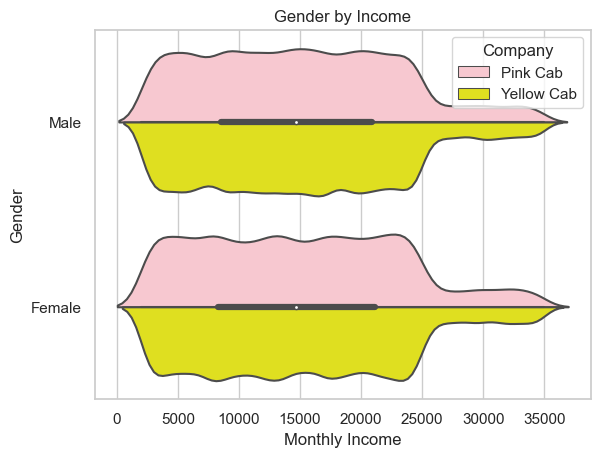

In [53]:
# income
sns.violinplot(data=master, x='Income (USD/Month)', y='Gender', 
               hue='Company', palette=company_colors, split=True)
plt.title('Gender by Income')
plt.xlabel('Monthly Income')
plt.ylabel('Gender')

Based on the above violin plots, it is visually apparent that the demographics of both companies are quite comparable in all three categories of age, gender, and monthly income.

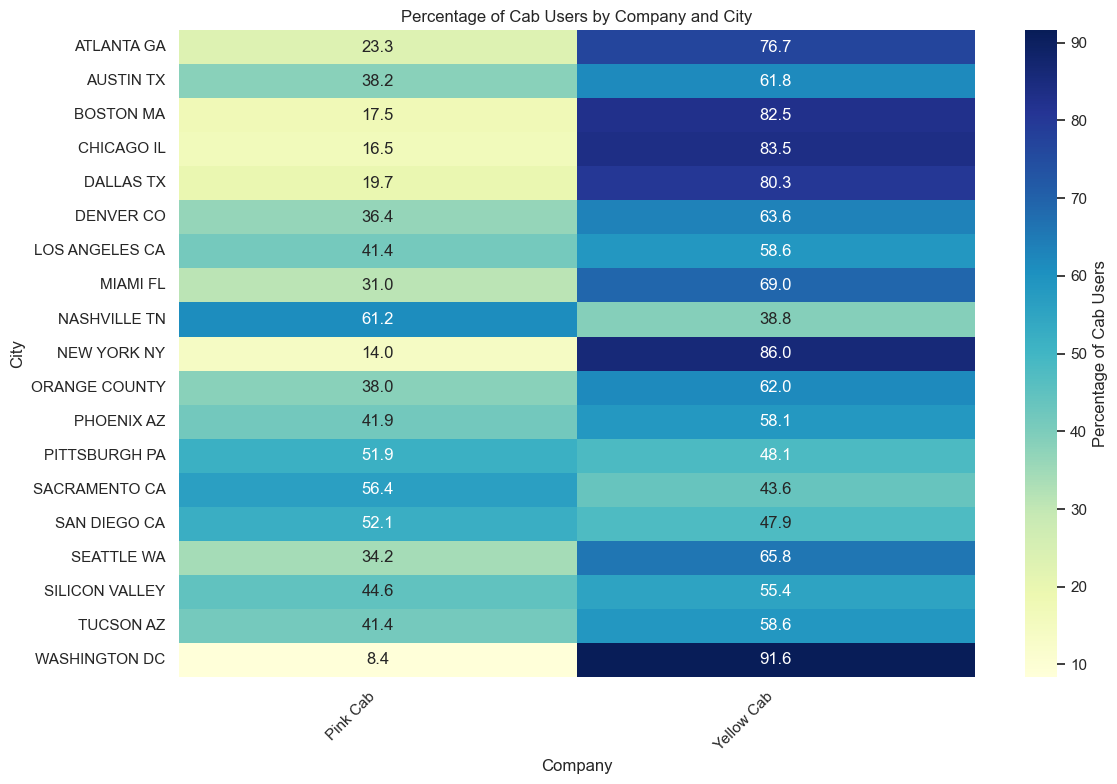

In [57]:
cab_usage_percentage = master.groupby(['City', 'Company'])['Customer ID'].count()/master.groupby('City')['Customer ID'].count()
cab_usage_percentage = cab_usage_percentage.unstack(fill_value=0) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(cab_usage_percentage, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Percentage of Cab Users'})
plt.title('Percentage of Cab Users by Company and City')
plt.xlabel('Company')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

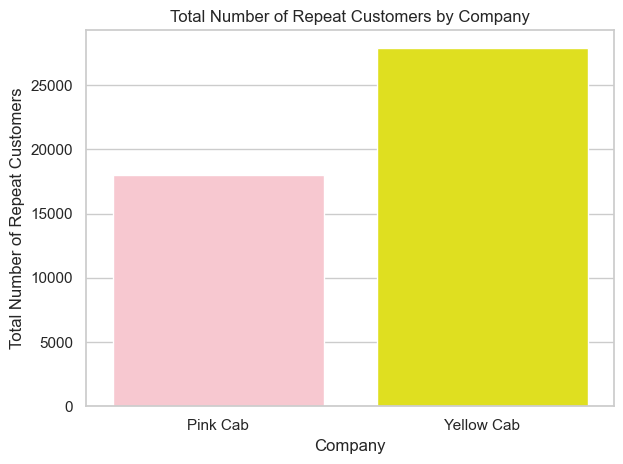

In [68]:
customer_counts = master.groupby(['Company', 'Customer ID']).size()
repeat_counts = customer_counts.groupby('Company').apply(lambda x: (x > 1).sum())

sns.barplot(data=repeat_counts.reset_index(name='Repeat Customers'), 
            x='Company', y='Repeat Customers', 
            palette=company_colors)
plt.title('Total Number of Repeat Customers by Company')
plt.xlabel('Company')
plt.ylabel('Total Number of Repeat Customers')

plt.tight_layout()
plt.show()

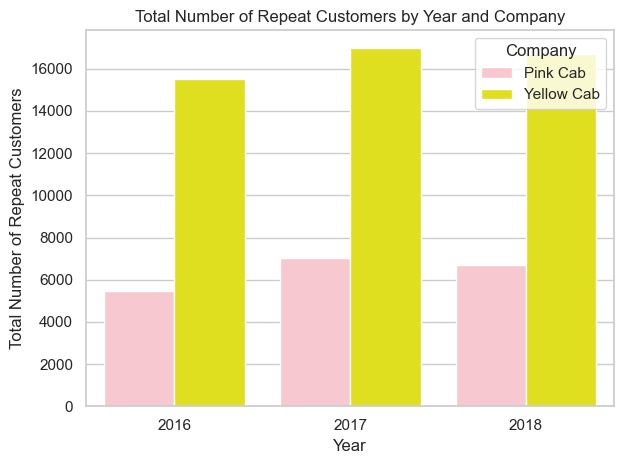

In [70]:
repeat_counts = master[master.duplicated(subset=['Customer ID', 'Company', 'Year'], keep='first')].groupby(['Company', 'Year'])['Customer ID'].nunique()
repeat_counts = repeat_counts.reset_index(name='Repeat Customers')

sns.barplot(data=repeat_counts, x='Year', y='Repeat Customers', 
            hue='Company', palette=company_colors)
plt.title('Total Number of Repeat Customers by Year and Company')
plt.xlabel('Year')
plt.ylabel('Total Number of Repeat Customers')
plt.legend(title='Company')

plt.tight_layout()
plt.show()

<h2>Profits</h2>
<ol start='6'>
    <li>What is the difference in profits per company?</li>
    <li>What is the average profit per ride?</li>
</ol>

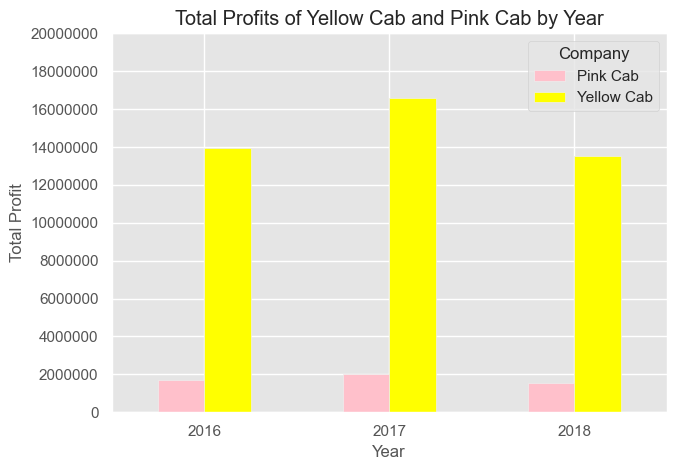

In [93]:
grouped_data = master.groupby(['Company', 'Year'])['Profit'].sum().reset_index()

pivot_data = grouped_data.pivot(index='Year', columns='Company', values='Profit')

pivot_data.plot(kind='bar', color=company_colors, stacked=False)
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profits of Yellow Cab and Pink Cab by Year')
plt.xticks(rotation=0)
plt.tight_layout()
step_size = 2000000
plt.yticks(np.arange(0, max(pivot_data.sum(axis=1)) + step_size, step_size))
plt.ticklabel_format(style='plain', axis='y')

plt.show()

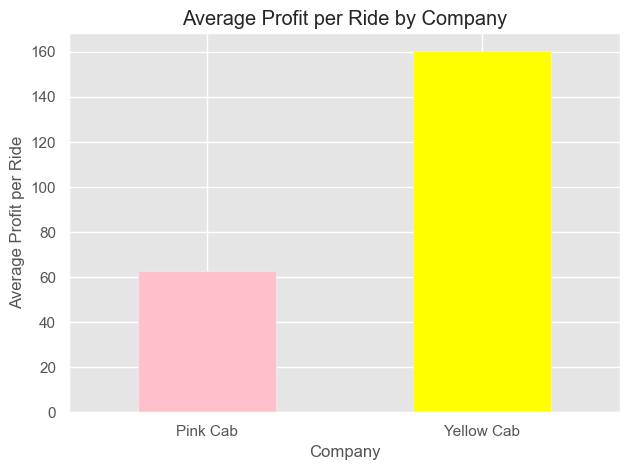

In [97]:
average_profit_per_ride = master.groupby('Company')['Profit'].mean()

average_profit_per_ride.plot(kind='bar', color=['pink', 'yellow'])
plt.xlabel('Company')
plt.ylabel('Average Profit per Ride')
plt.title('Average Profit per Ride by Company')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

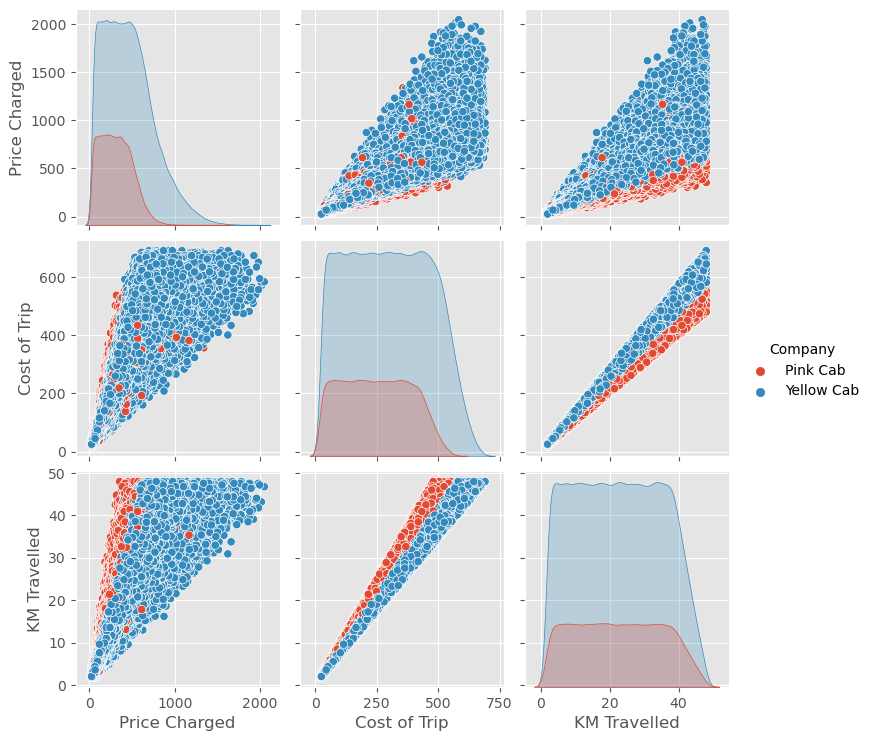

In [29]:
sns.pairplot(master,
            vars=['Price Charged',
                  'Cost of Trip',
                  'KM Travelled'],
            hue='Company')
plt.show()

In [41]:
corr = master[['Price Charged',
                  'Cost of Trip',
                  'KM Travelled']].corr()
corr

,Price Charged,Cost of Trip,KM Travelled
Price Charged,1.000000,0.859812,0.835753
Cost of Trip,0.859812,1.000000,0.981848
KM Travelled,0.835753,0.981848,1.000000


<Axes: >

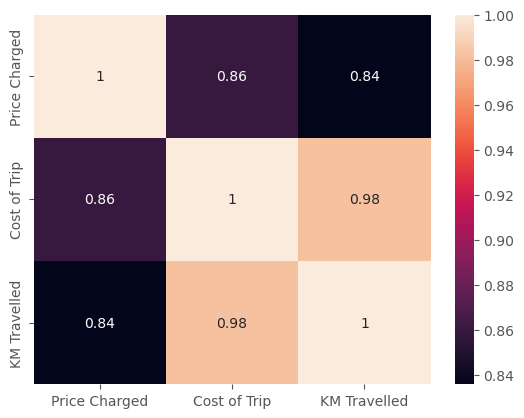

In [43]:
sns.heatmap(corr, annot=True)

<h2>Takeaways</h2>
Yellow Cab has outshined Pink Cab in nearly every category and datapoint comparison.
<ul>
    <li>Rides: Yellow Cab has provided more service overall.</li>
    <li>Customers: Yellow Cab has more customers in total and more repeat customers.</li>
    <li>Profit: Yellow Cab has more profits in total and on average.</li>
</ul>

<h2>Recommendation</h2>
Based on this analysis, the recommendation is to invest in Yellow Cab.